# Support Vector Machines

In this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs.

## Load the first dataset

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import os

# This is done to suppress tonnes of warning messages that the call to sklearn fit method generates
import warnings
warnings.filterwarnings('ignore')

os.getcwd()
data1 = sio.loadmat('./data/ex6data1.mat')
X_1 = data1['X']
y_1 = data1['y']

#### Do a scatter plot of the first dataset 

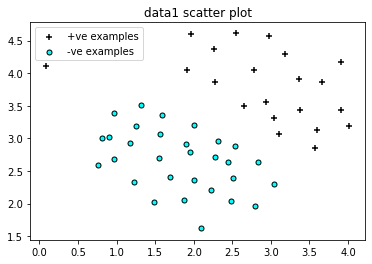

In [116]:
fig1, ax1 = plt.subplots()

def plot_datapoints(X, y, ax):
    X_df = pd.DataFrame(data=X)
    # Indices of training examples where output = +1
    pos = y == 1
    X_pos_df = X_df[pos]
    # Indices of training examples where output = -1
    neg = y == 0
    X_neg_df = X_df[neg]
    ax.scatter(X_pos_df.iloc[:, 0], X_pos_df.iloc[:, 1], c='black', marker='+', cmap=plt.cm.coolwarm, s=30, 
               edgecolors='k', label='+ve examples')
    ax.scatter(X_neg_df.iloc[:, 0], X_neg_df.iloc[:, 1], marker='o', c='cyan', cmap=plt.cm.coolwarm, s=25, 
               edgecolors='k', label='-ve examples')  
    return ax

plot_datapoints(X_1, y_1, ax1)
ax1.set_title('data1 scatter plot')
ax1.legend()
plt.show()

In this dataset, the positions of the positive examples (indicated with +) and the negative examples 
(indicated by o) suggest a natural separation indicated
by the gap. However, notice that there is an outlier positive example + on the far left at about (0:1; 4:1). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary. 

#### Fit a linear support vector classifier and plot the decision boundary with hyperparameter C=1

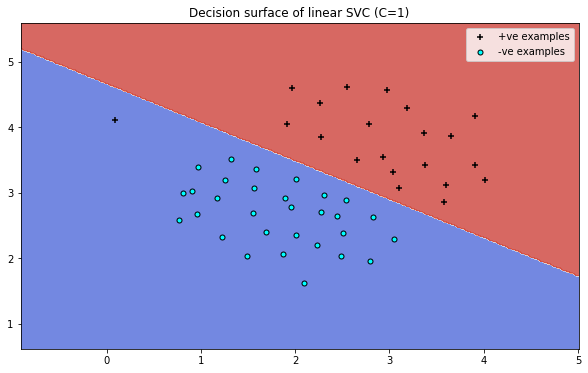

In [117]:
from sklearn.svm import LinearSVC

def make_meshgrid(x, y):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def fit_model_data(clf, X, y, str_title, fig_size=(10,6)):    
    clf.fit(X, y)
    fig, ax = plt.subplots(figsize=fig_size)
    # title for the plots
    title = str_title
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)        
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax = plot_datapoints(X, y, ax)
    ax.set_title(title)
    ax.legend()
    plt.show()
    
clf = LinearSVC(C=1)
plot_title = 'Decision surface of linear SVC (C=1)'
fit_model_data(clf, X_1, y_1, plot_title)    

Note that with sufficient l2 penalty, we avoid overfitting the data and the decision boundary is not unduly impacted 
by the presence of outliers

#### Now plot the decision boundary with C=100

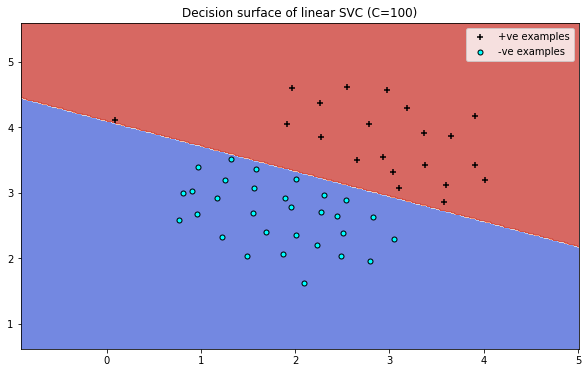

In [118]:
clf = LinearSVC(C=100, max_iter=50000)
plot_title = 'Decision surface of linear SVC (C=100)'
fit_model_data(clf, X_1, y_1, plot_title)

As we reduce the l2 penalty, the model starts to overfit the training samples and decision boundary shifts to correctly classify the outlier data points

## SVM with Gaussian Kernels

You can think of the Gaussian kernel as a similarity function that measures the "distance" between a pair of examples,
(x(i); x(j)). The Gaussian kernel is also parameterized by a bandwidth parameter, sigma, which determines how fast the similarity metric decreases (to 0)
as the examples are further apart.

#### Load the data and do a scatterplot

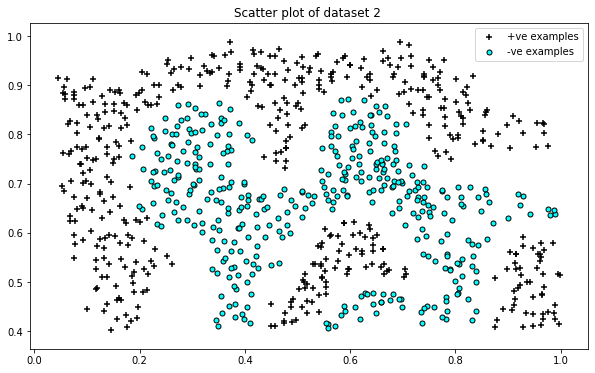

In [119]:
data2 = sio.loadmat('./data/ex6data2.mat')
X_2 = data2['X']
y_2 = data2['y']

def plot_data2(X, y, str_title):
    fig2, ax2 = plt.subplots(figsize=(10,6))
    title = str_title
    ax2 = plot_datapoints(X, y, ax2)
    ax2.set_title(title)
    ax2.legend()
    plt.show()
    
plot_data2(X_2, y_2, 'Scatter plot of dataset 2 ')    

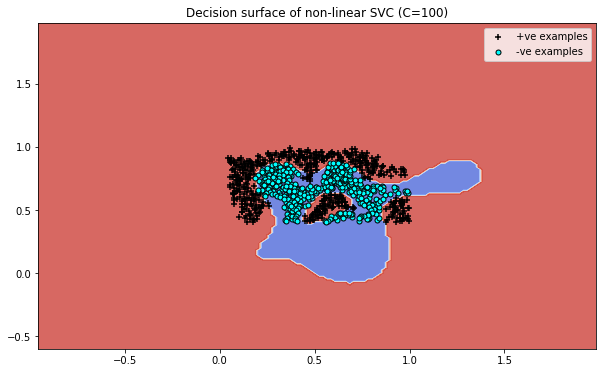

In [120]:
from sklearn.svm import SVC

clf = SVC(C=100)
plot_title = 'Decision surface of non-linear SVC (C=100)'
fit_model_data(clf, X_2, y_2, plot_title)

The decision boundary is able to separate most of the positive and
negative examples correctly and follows the contours of the dataset well.

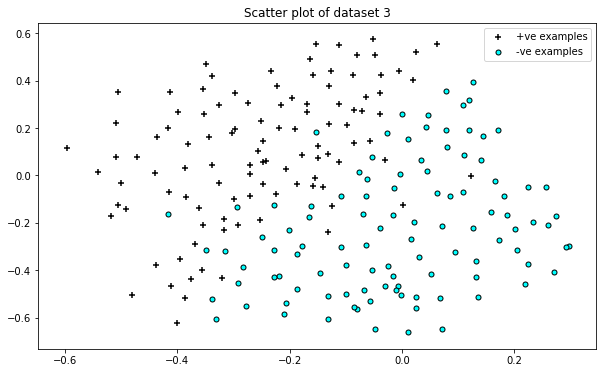

In [121]:
data3 = sio.loadmat('./data/ex6data3.mat')
X_3 = data3['X']
y_3 = data3['y']
plot_data2(X_3, y_3, 'Scatter plot of dataset 3')

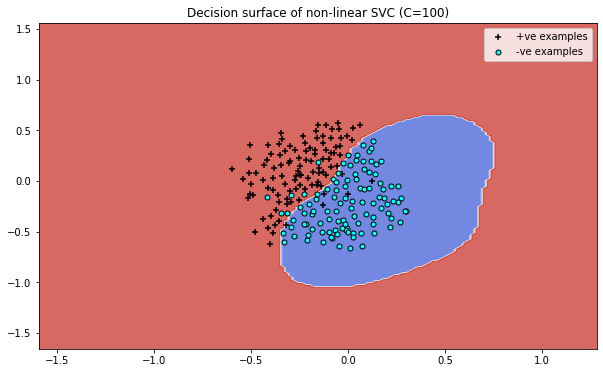

In [122]:
clf = SVC(C=1)
plot_title = 'Decision surface of non-linear SVC (C=100)'
fit_model_data(clf, X_3, y_3, plot_title)

### Hyperparameter tuning for SVC using grid search

For both C and siga, we
suggest trying values in multiplicative steps (e.g., 0.01; 0.03; 0.1; 0.3; 1; 3; 10; 30).
Note that you should try all possible pairs of values for C and  (e.g., C = 0.3
and sigma = 0.1). For example, if you try each of the 8 values listed above for C
and for sigma squared, you would end up training and evaluating (on the cross validation
set) a total of 8e2 = 64 different models.

In [123]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],  
              'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(X_3, y_3)
grid.best_params_

{'C': 30, 'gamma': 3, 'kernel': 'rbf'}

#### Decision boundary with the optimized value of hyperparameters C and gamma

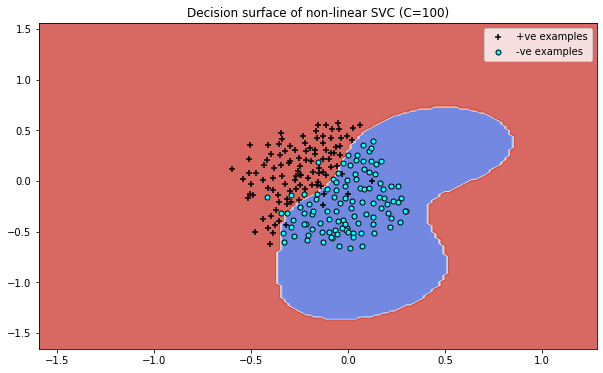

In [124]:
clf = SVC(C=30, gamma=3)
plot_title = 'Decision surface of non-linear SVC (C=100)'
fit_model_data(clf, X_3, y_3, plot_title)